### Data Analysis Project

Your boss has just acquired data about how much audiences and critics like movies as well as numerous other variables about the movies. This dataset is provided below, and it includes information from Rotten Tomatoes and IMDB for a random sample of movies.

She is interested in learning what attributes make a movie popular. She is also interested in learning something new about movies. She wants you team to figure it all out.

As part of this project you will complete exploratory data analysis (EDA), modeling, and prediction.

The data set is comprised of 651 randomly sampled movies produced and released before 2016.

Some of these variables are only there for informational purposes and do not make any sense to include in a statistical analysis. It is up to you to decide which variables are meaningful and which should be omitted. For example information in the the `actor1` through `actor5` variables was used to determine whether the movie casts an actor or actress who won a best actor or actress Oscar.

You might also choose to omit certain observations or restructure some of the variables to make them suitable for answering your research questions.

When you are fitting a model you should also be careful about collinearity, as some of these variables may be dependent on each other.

Create new variable based on `title_type`: New variable should be called `feature_film` with levels yes (movies that are feature films) and no 

Create new variable based on `genre`: New variable should be called `drama` with levels yes (movies that are dramas) and no

Create new variable based on `mpaa_rating`: New variable should be called `mpaa_rating_R` with levels yes (movies that are R rated) and no 

Create two new variables based on `thtr_rel_month`

New variable called `oscar_season` with levels yes (if movie is released in November, October, or December) and no 

New variable called `summer_season` with levels yes (if movie is released in May, June, July, or August) and no 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

#from pycaret.classification import *
#from pycaret.clustering import *
from pycaret.regression import *

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,2008.0,10.0,28.0,5.9,8345,Rotten,44,Spilled,26,no,no,no,no,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/
647,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,1998.0,6.0,30.0,6.7,46794,Rotten,29,Upright,81,no,no,no,no,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/
648,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,2008.0,10.0,14.0,5.9,10087,Fresh,80,Spilled,52,no,no,no,no,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...
649,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,2004.0,11.0,2.0,5.8,66054,Rotten,31,Spilled,34,no,no,no,no,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             651 non-null    object 
 1   title_type        651 non-null    object 
 2   genre             651 non-null    object 
 3   runtime           650 non-null    float64
 4   mpaa_rating       651 non-null    object 
 5   studio            643 non-null    object 
 6   thtr_rel_year     651 non-null    int64  
 7   thtr_rel_month    651 non-null    int64  
 8   thtr_rel_day      651 non-null    int64  
 9   dvd_rel_year      643 non-null    float64
 10  dvd_rel_month     643 non-null    float64
 11  dvd_rel_day       643 non-null    float64
 12  imdb_rating       651 non-null    float64
 13  imdb_num_votes    651 non-null    int64  
 14  critics_rating    651 non-null    object 
 15  critics_score     651 non-null    int64  
 16  audience_rating   651 non-null    object 
 1

In [5]:
df.describe(include='all')

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
count,651,651,651,650.000000,651,643,651.000000,651.000000,651.000000,643.000000,643.000000,643.000000,651.000000,651.000000,651,651.000000,651,651.000000,651,651,651,651,651,651,649,649,644,642,638,636,651,651
unique,647,3,11,NaN,6,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,2,2,2,2,2,2,532,485,572,601,607,615,650,650
top,Where the Heart Is,Feature Film,Drama,NaN,R,Paramount Pictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rotten,NaN,Upright,NaN,no,no,no,no,no,no,Woody Allen,John Travolta,Diane Keaton,Gary Busey,John P. Ryan,Kevin Durand,http://www.imdb.com/title/tt1155592/,//www.rottentomatoes.com/m/man_on_wire/
freq,2,591,305,NaN,329,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307,NaN,376,NaN,629,644,558,579,608,636,4,7,5,3,3,2,2,2
mean,NaN,NaN,NaN,105.821538,NaN,NaN,1997.941628,6.740399,14.416283,2004.427683,6.332815,15.007776,6.493088,57532.983103,NaN,57.688172,NaN,62.362519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,19.445047,NaN,NaN,10.974501,3.554223,8.861167,4.643588,3.378228,8.867400,1.084747,112124.386910,NaN,28.402971,NaN,20.222624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,NaN,NaN,1970.000000,1.000000,1.000000,1991.000000,1.000000,1.000000,1.900000,180.000000,NaN,1.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,92.000000,NaN,NaN,1990.000000,4.000000,7.000000,2001.000000,3.000000,7.000000,5.900000,4545.500000,NaN,33.000000,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,103.000000,NaN,NaN,2000.000000,7.000000,15.000000,2004.000000,6.000000,15.000000,6.600000,15116.000000,NaN,61.000000,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,115.750000,NaN,NaN,2007.000000,10.000000,21.000000,2008.000000,9.000000,23.000000,7.300000,58300.500000,NaN,83.000000,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(651, 32)

In [7]:
df.columns

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url'], dtype='object')

### create new features

In [8]:
df["title_type"].value_counts()

Feature Film    591
Documentary      55
TV Movie          5
Name: title_type, dtype: int64

In [9]:
df["feature_film"]= np.where(df["title_type"] == "Feature Film",1,0)

In [10]:
df["feature_film"].value_counts()

1    591
0     60
Name: feature_film, dtype: int64

In [11]:
df["genre"].value_counts()

Drama                        305
Comedy                        87
Action & Adventure            65
Mystery & Suspense            59
Documentary                   52
Horror                        23
Other                         16
Art House & International     14
Musical & Performing Arts     12
Animation                      9
Science Fiction & Fantasy      9
Name: genre, dtype: int64

In [12]:
df["drama"] = np.where(df["genre"] == "Drama",1,0)

In [13]:
df["drama"].value_counts()

0    346
1    305
Name: drama, dtype: int64

In [14]:
df["mpaa_rating"].value_counts()

R          329
PG-13      133
PG         118
Unrated     50
G           19
NC-17        2
Name: mpaa_rating, dtype: int64

In [15]:
df["mpaa_rating_R"] = np.where(df["mpaa_rating"] == "R",1,0)

In [16]:
df["mpaa_rating_R"].value_counts()

1    329
0    322
Name: mpaa_rating_R, dtype: int64

In [17]:
df["thtr_rel_month"].value_counts()

6     72
12    70
10    70
1     69
9     53
11    51
3     51
7     48
4     45
8     44
5     44
2     34
Name: thtr_rel_month, dtype: int64

In [18]:
conditions = [df["thtr_rel_month"] == 10, df["thtr_rel_month"] == 11, df["thtr_rel_month"] == 12]

In [19]:
values = [1,1,1]

In [20]:
df["oscar_season"] = np.select(conditions,values)

In [21]:
df["oscar_season"].value_counts()

0    460
1    191
Name: oscar_season, dtype: int64

In [22]:
conditions1 = [df["thtr_rel_month"] == 5, df["thtr_rel_month"] == 6, df["thtr_rel_month"] == 7, df["thtr_rel_month"] == 8]

In [23]:
values1 = [1,1,1,1]

In [24]:
df["summer_season"] = np.select(conditions1,values1)

In [25]:
df["summer_season"].value_counts()

0    443
1    208
Name: summer_season, dtype: int64

In [26]:
df

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url,feature_film,drama,mpaa_rating_R,oscar_season,summer_season
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/,1,1,1,0,0
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/,1,1,0,0,0
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/,1,0,1,0,1
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/,1,1,0,1,0
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Death Defying Acts,Feature Film,Drama,97.0,PG,Genius Productions,2008,7,11,2008.0,10.0,28.0,5.9,8345,Rotten,44,Spilled,26,no,no,no,no,no,no,Gillian Armstrong,Guy Pearce,Catherine Zeta-Jones,Timothy Spall,Saoirse Ronan,Jack Bailey,http://www.imdb.com/title/tt0472071/,//www.rottentomatoes.com/m/death_defying_acts/,1,1,0,0,1
647,Half Baked,Feature Film,Comedy,82.0,R,Universal Pictures,1998,1,16,1998.0,6.0,30.0,6.7,46794,Rotten,29,Upright,81,no,no,no,no,no,no,Tamra Davis,Dave Chappelle,Guillermo Diaz,Jim Breuer,Harland Williams,Rachel True,http://www.imdb.com/title/tt0120693/,//www.rottentomatoes.com/m/half_baked/,1,0,1,0,0
648,Dance of the Dead,Feature Film,Action & Adventure,87.0,R,Grindhouse Entertainment,2008,3,9,2008.0,10.0,14.0,5.9,10087,Fresh,80,Spilled,52,no,no,no,no,no,no,Gregg Bishop,Jared Kusnitz,Greyson Chadwick,Chandler Darby,Carissa Capobianco,Randy McDowell,http://www.imdb.com/title/tt0926063/,//www.rottentomatoes.com/m/1203339-dance_of_th...,1,0,1,0,0
649,Around the World in 80 Days,Feature Film,Action & Adventure,120.0,PG,Buena Vista Pictures,2004,6,16,2004.0,11.0,2.0,5.8,66054,Rotten,31,Spilled,34,no,no,no,no,no,yes,Frank Coraci,Jackie Chan,Steve Coogan,Ewen Bremner,Robert Fyfe,Ian McNeice,http://www.imdb.com/title/tt0327437/,//www.rottentomatoes.com/m/around_the_world_in...,1,0,0,0,1


### Data Visualization

### Univariate Data Exploration

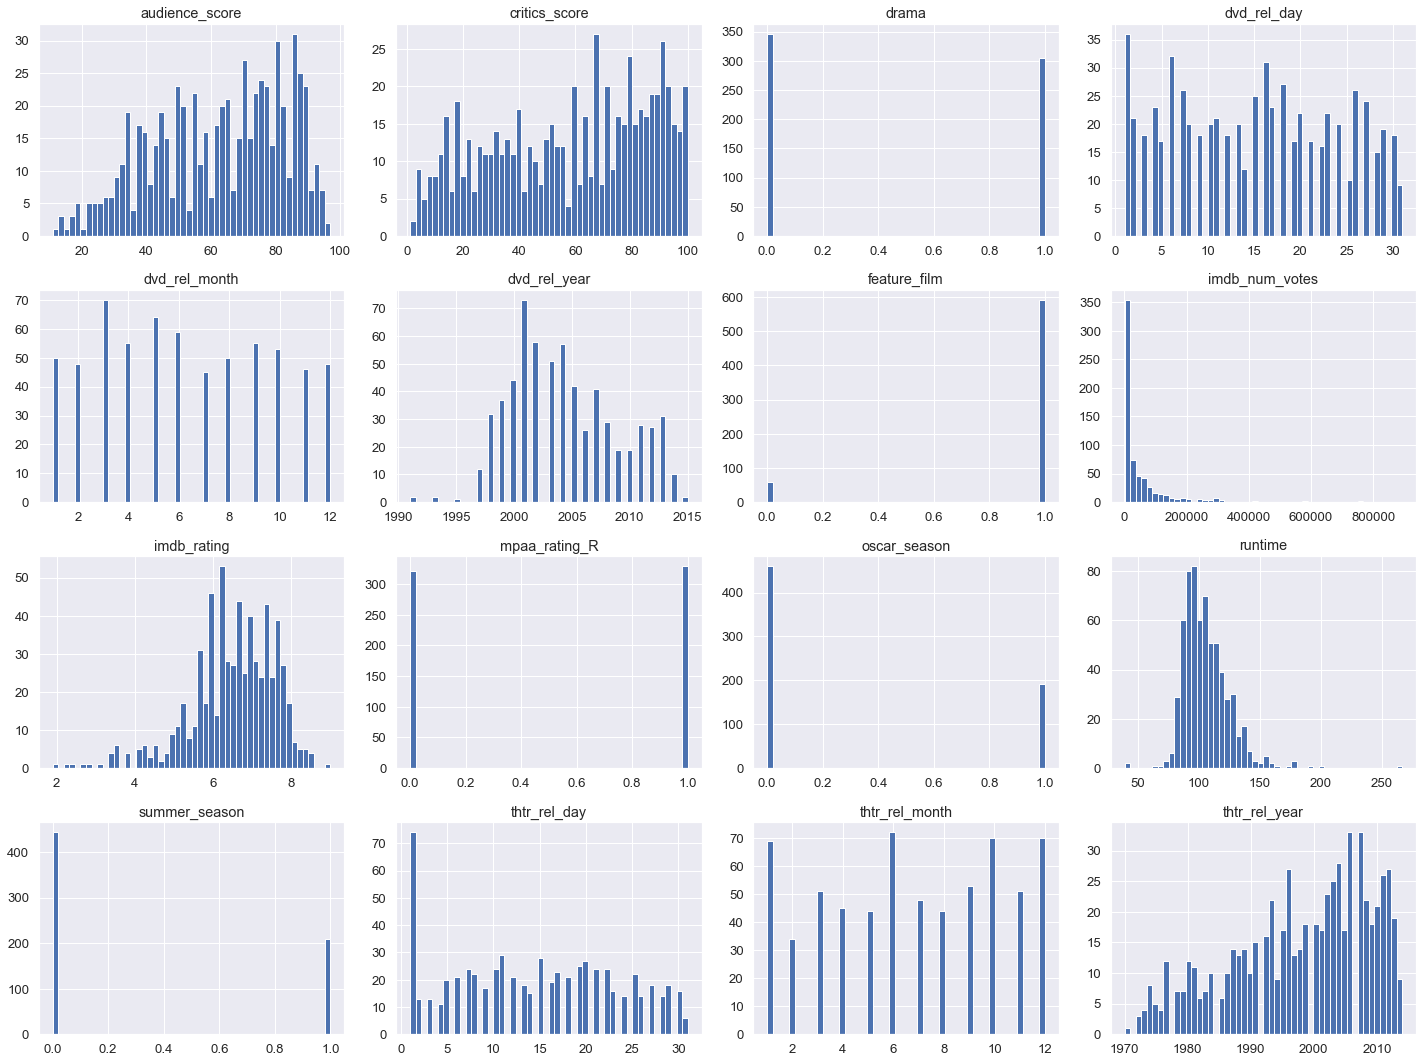

In [27]:
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

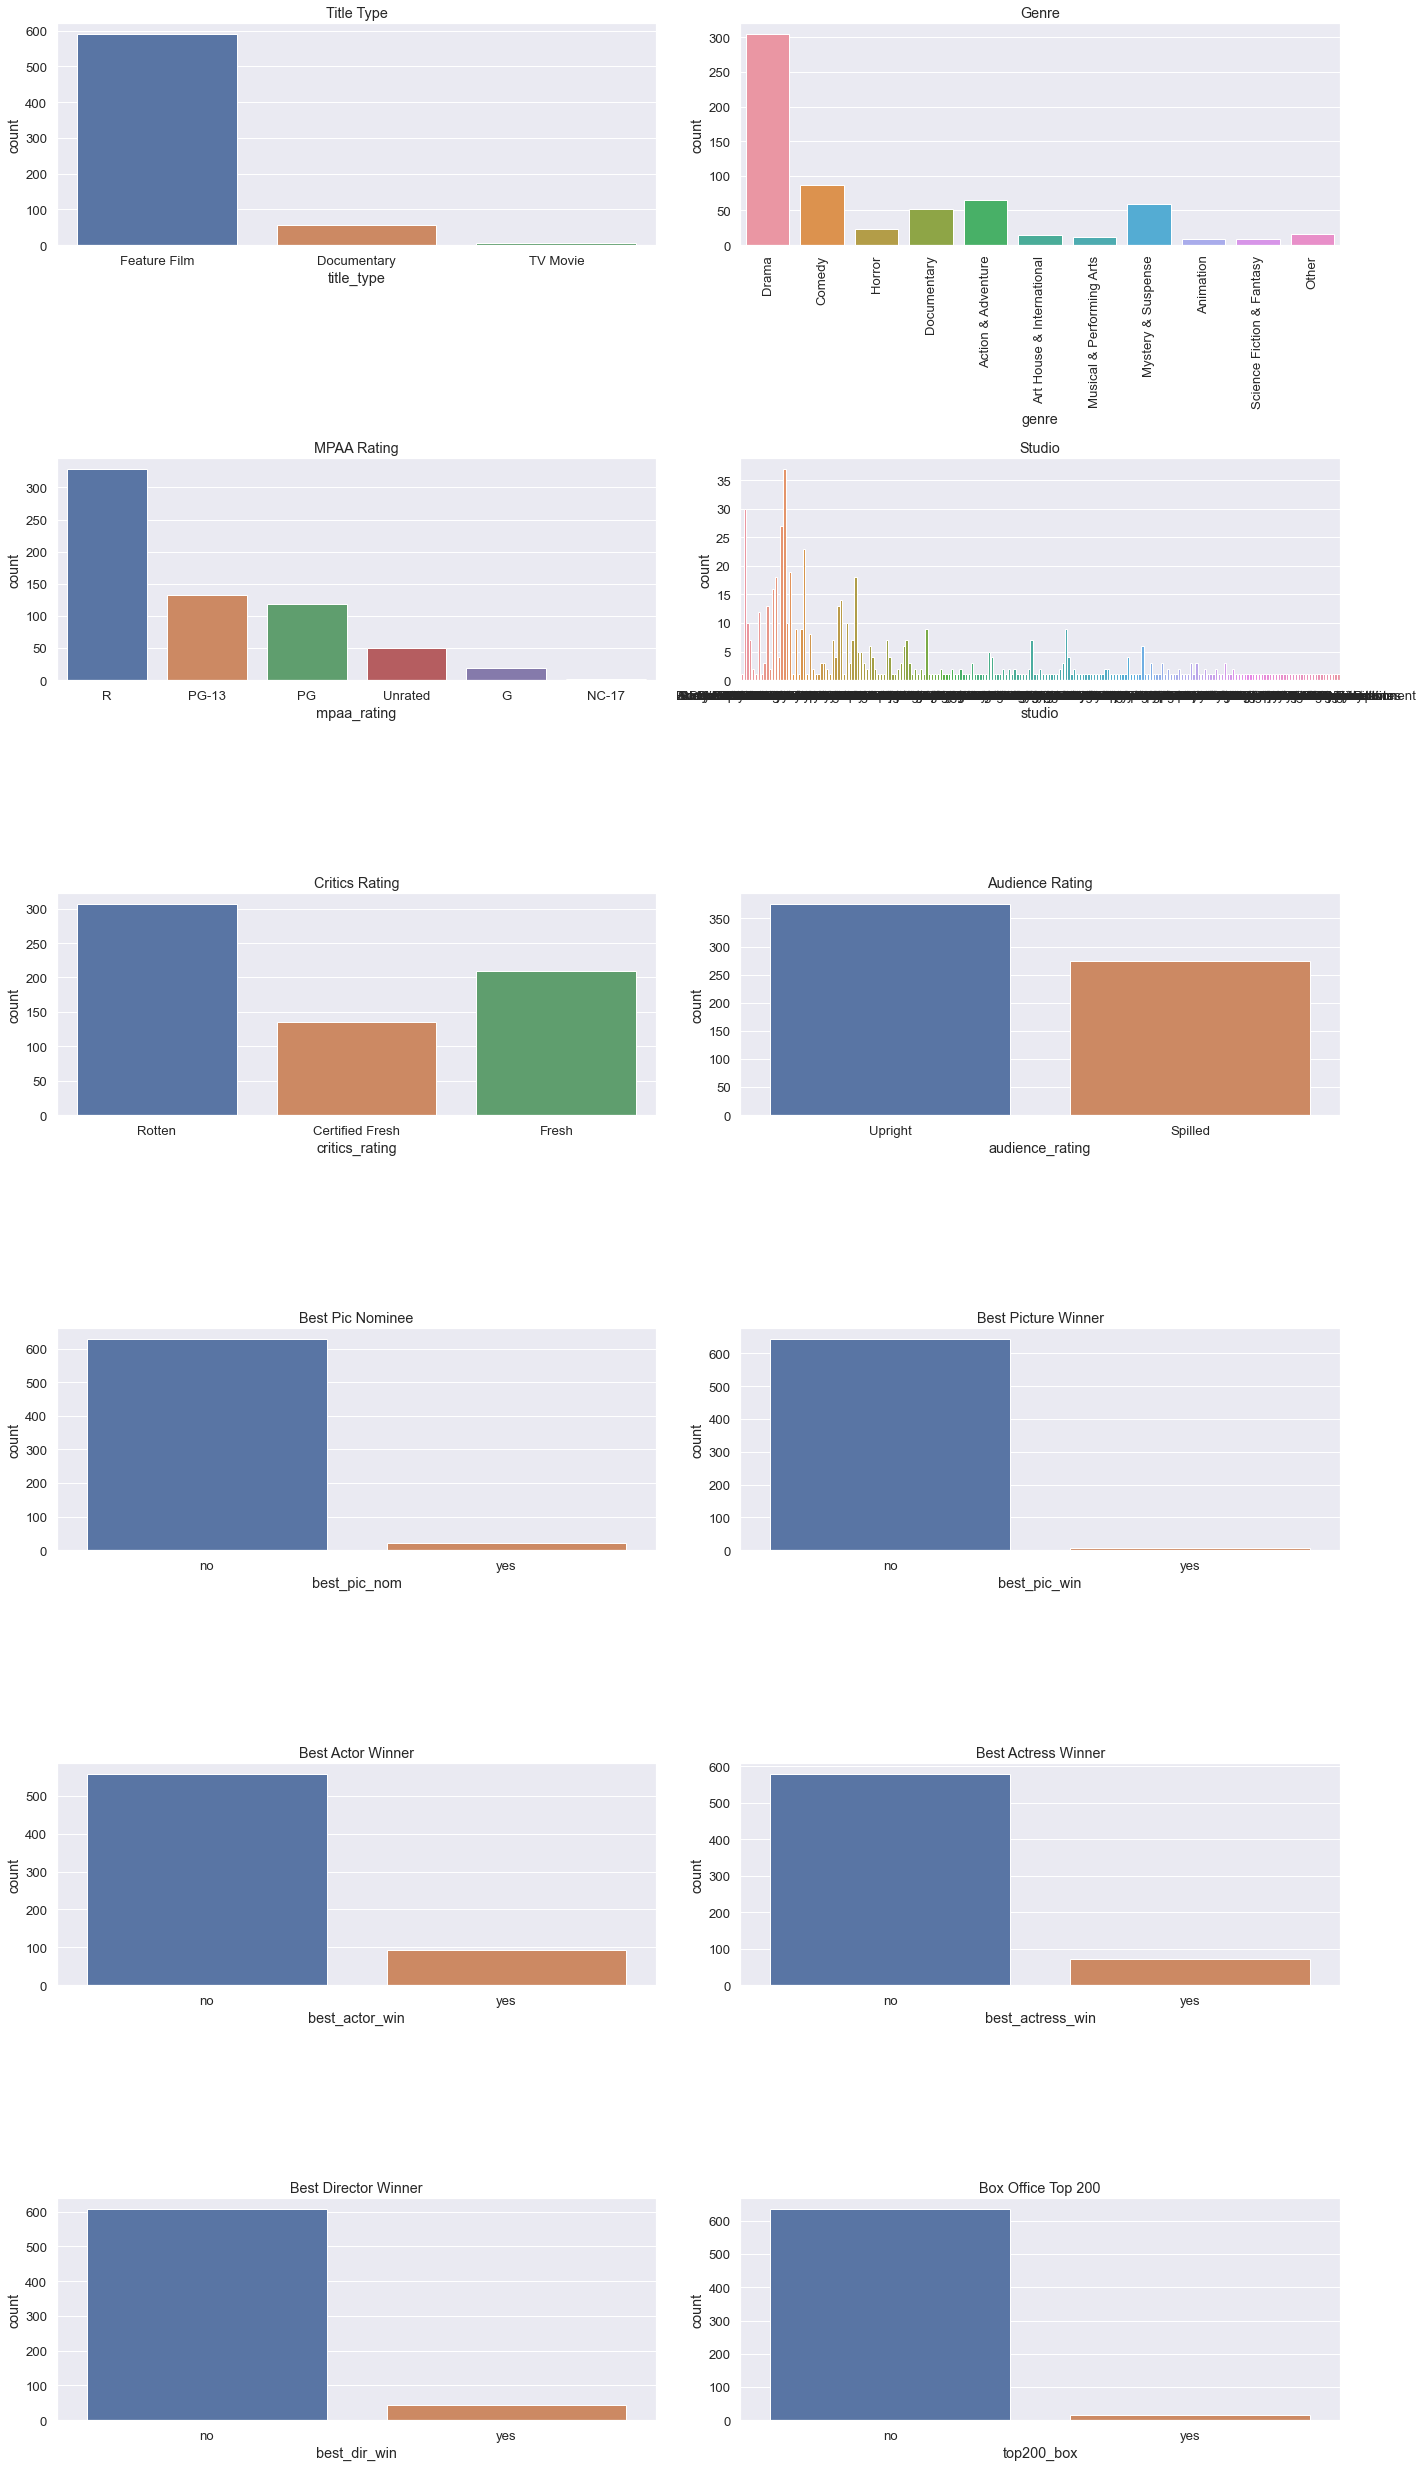

In [28]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Title Type")
sns.countplot(df.title_type)

plt.subplot(7,2,2)
plt.title("Genre")
plt.xticks(rotation=90)
sns.countplot(df.genre)

plt.subplot(7,2,3)
plt.title("MPAA Rating")
sns.countplot(df.mpaa_rating)

plt.subplot(7,2,4)
plt.title("Studio")
sns.countplot(df.studio)

plt.subplot(7,2,5)
plt.title("Critics Rating")
sns.countplot(df.critics_rating)

plt.subplot(7,2,6)
plt.title("Audience Rating")
sns.countplot(df.audience_rating)

plt.subplot(7,2,7)
plt.title("Best Pic Nominee")
sns.countplot(df.best_pic_nom)

plt.subplot(7,2,8)
plt.title("Best Picture Winner")
sns.countplot(df.best_pic_win)

plt.subplot(7,2,9)
plt.title("Best Actor Winner")
sns.countplot(df.best_actor_win)

plt.subplot(7,2,10)
plt.title("Best Actress Winner")
sns.countplot(df.best_actress_win)

plt.subplot(7,2,11)
plt.title("Best Director Winner")
sns.countplot(df.best_dir_win)

plt.subplot(7,2,12)
plt.title("Box Office Top 200")
sns.countplot(df.top200_box)

plt.tight_layout()
plt.show()

Perform exploratory data analysis (EDA) of the relationship between audience_score and the new variables constructed in the previous part. Your EDA should contain numerical summaries and visualizations. This might mean you initially create a lot more visualizations and summary statistics than what you finally choose to include in your paper. Each R output and plot should be accompanied by a brief interpretation.

In [29]:
df.columns

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url', 'feature_film', 'drama', 'mpaa_rating_R', 'oscar_season', 'summer_season'], dtype='object')

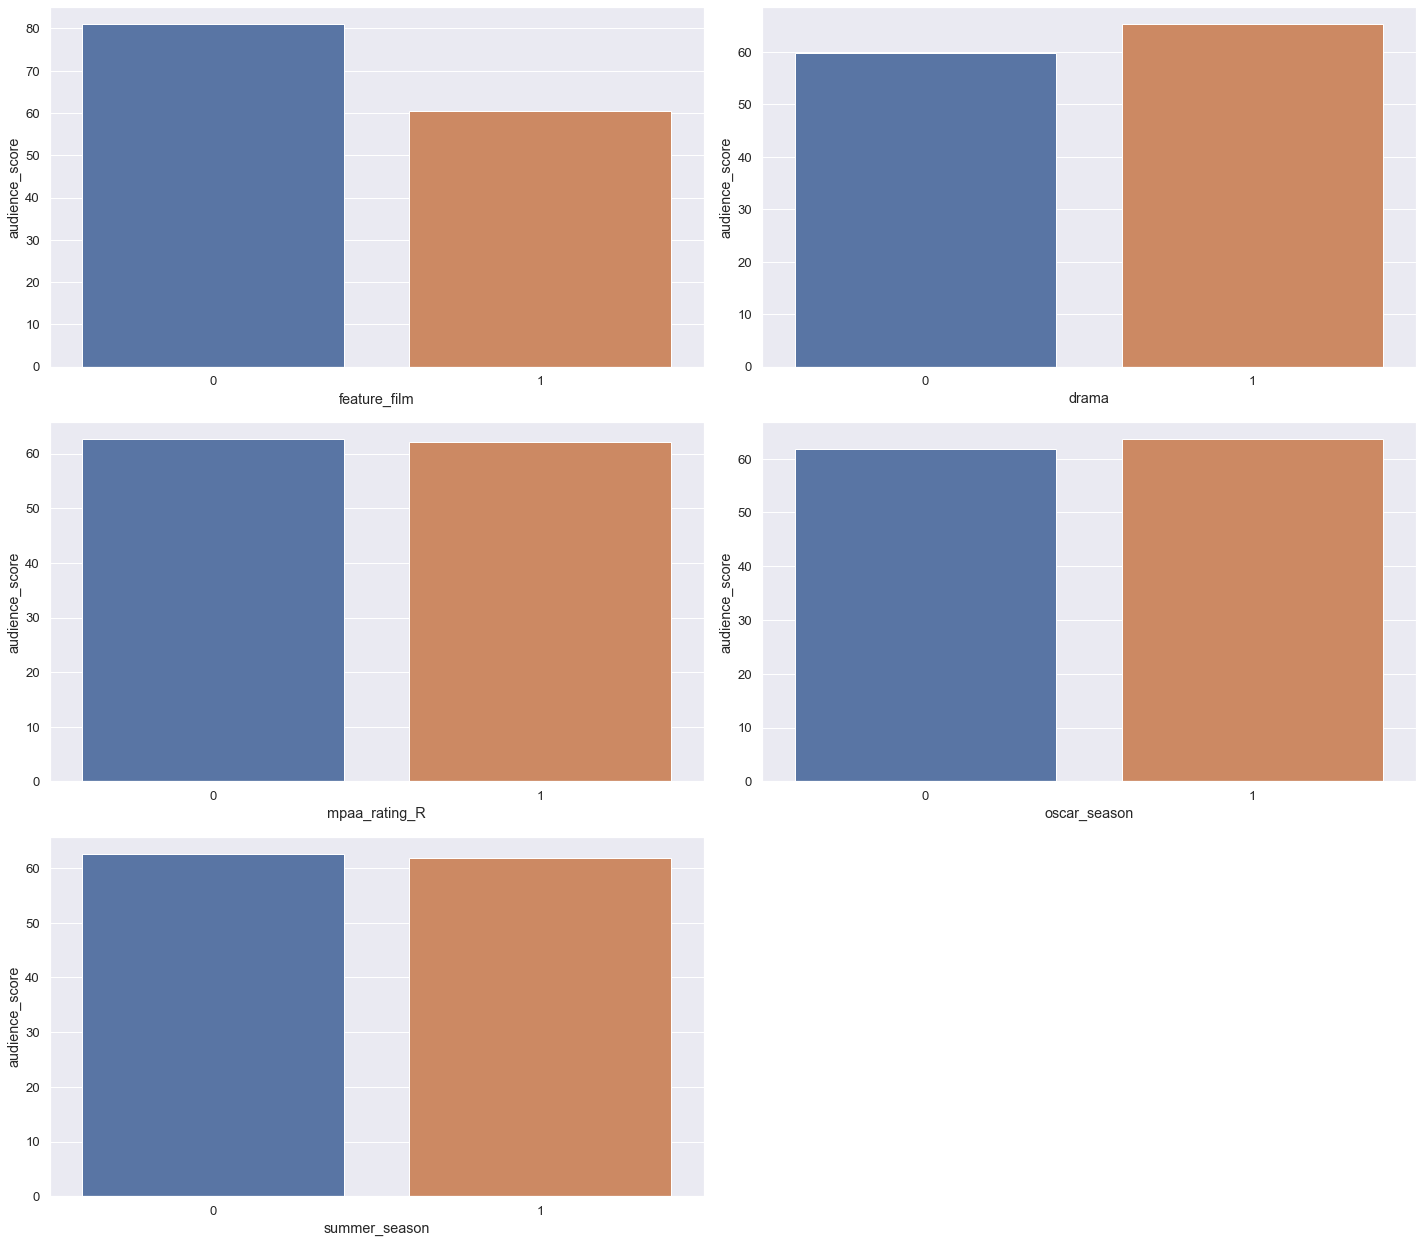

In [30]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("")
sns.barplot(x="feature_film", y='audience_score', data=df, ci=None)

plt.subplot(7,2,2)
plt.title("")
sns.barplot(x="drama", y='audience_score', data=df, ci=None)

plt.subplot(7,2,3)
plt.title("")
sns.barplot(x="mpaa_rating_R", y='audience_score', data=df, ci=None)

plt.subplot(7,2,4)
plt.title("")
sns.barplot(x="oscar_season", y='audience_score', data=df, ci=None)

plt.subplot(7,2,5)
plt.title("")
sns.barplot(x="summer_season", y='audience_score', data=df, ci=None)

plt.tight_layout()
plt.show()

### Drop unwanted features

In [31]:
df.columns

Index(['title', 'title_type', 'genre', 'runtime', 'mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url', 'feature_film', 'drama', 'mpaa_rating_R', 'oscar_season', 'summer_season'], dtype='object')

In [32]:
df.drop(['title', 'title_type', 'genre','mpaa_rating', 'studio', 'thtr_rel_year', 'thtr_rel_month', 'thtr_rel_day', 'dvd_rel_year', 
        'dvd_rel_month', 'dvd_rel_day','critics_rating','audience_rating','best_pic_nom', 'best_pic_win', 'best_actor_win', 'best_actress_win', 
        'best_dir_win', 'top200_box', 'director', 'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'imdb_url', 'rt_url'],axis=1,inplace=True)

In [33]:
df

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score,feature_film,drama,mpaa_rating_R,oscar_season,summer_season
0,80.0,5.5,899,45,73,1,1,1,0,0
1,101.0,7.3,12285,96,81,1,1,0,0,0
2,84.0,7.6,22381,91,91,1,0,1,0,1
3,139.0,7.2,35096,80,76,1,1,0,1,0
4,90.0,5.1,2386,33,27,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
646,97.0,5.9,8345,44,26,1,1,0,0,1
647,82.0,6.7,46794,29,81,1,0,1,0,0
648,87.0,5.9,10087,80,52,1,0,1,0,0
649,120.0,5.8,66054,31,34,1,0,0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   runtime         650 non-null    float64
 1   imdb_rating     651 non-null    float64
 2   imdb_num_votes  651 non-null    int64  
 3   critics_score   651 non-null    int64  
 4   audience_score  651 non-null    int64  
 5   feature_film    651 non-null    int32  
 6   drama           651 non-null    int32  
 7   mpaa_rating_R   651 non-null    int32  
 8   oscar_season    651 non-null    int32  
 9   summer_season   651 non-null    int32  
dtypes: float64(2), int32(5), int64(3)
memory usage: 38.3 KB


### Bivariate Data Exploration

In [35]:
# sns.jointplot(x='runtime', y='audience_score',data=df, kind='scatter')

# sns.jointplot(x='imdb_rating', y='audience_score',data=df, kind='scatter')

# sns.jointplot(x='imdb_num_votes', y='audience_score',data=df, kind='scatter')

# sns.jointplot(x='critics_score', y='audience_score',data=df, kind='scatter')

# plt.show()

### Correlation

In [36]:
df.corr()

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score,feature_film,drama,mpaa_rating_R,oscar_season,summer_season
runtime,1.000000,0.268240,0.347215,0.172499,0.180963,0.125811,0.241072,0.024185,0.227343,-0.061425
imdb_rating,0.268240,1.000000,0.331152,0.765036,0.864865,-0.305790,0.156223,0.027138,0.084412,-0.057936
imdb_num_votes,0.347215,0.331152,1.000000,0.209251,0.289813,0.149259,0.041516,0.062865,0.088860,0.007786
critics_score,0.172499,0.765036,0.209251,1.000000,0.704276,-0.321403,0.149908,-0.003184,0.039532,0.011011
audience_score,0.180963,0.864865,0.289813,0.704276,1.000000,-0.294665,0.138693,-0.016006,0.042199,-0.018814
feature_film,0.125811,-0.305790,0.149259,-0.321403,-0.294665,1.000000,0.256585,0.194613,0.030367,0.058886
drama,0.241072,0.156223,0.041516,0.149908,0.138693,0.256585,1.000000,0.153064,0.044044,-0.062387
mpaa_rating_R,0.024185,0.027138,0.062865,-0.003184,-0.016006,0.194613,0.153064,1.000000,0.003192,-0.013957
oscar_season,0.227343,0.084412,0.088860,0.039532,0.042199,0.030367,0.044044,0.003192,1.000000,-0.441537
summer_season,-0.061425,-0.057936,0.007786,0.011011,-0.018814,0.058886,-0.062387,-0.013957,-0.441537,1.000000


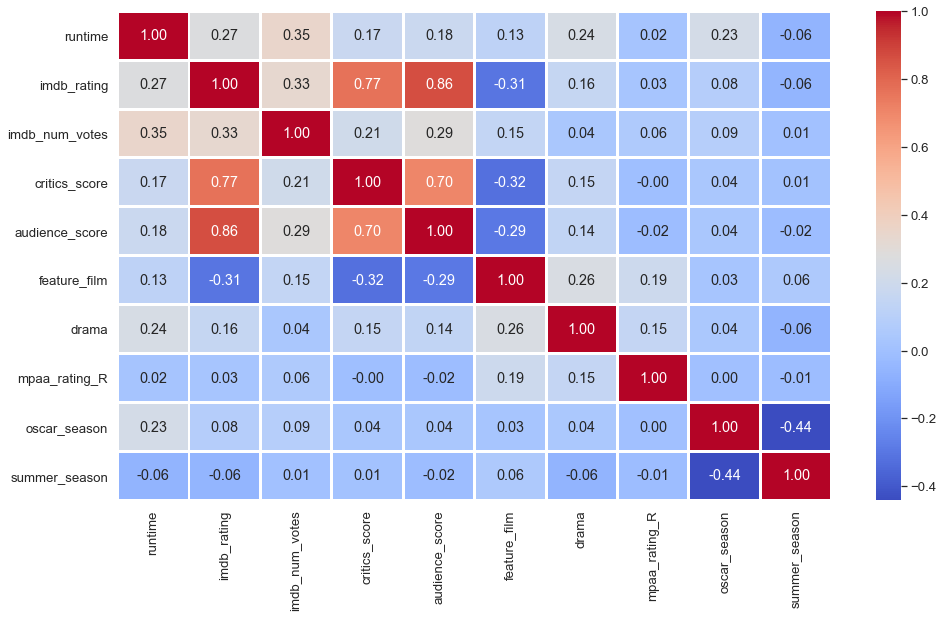

In [37]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

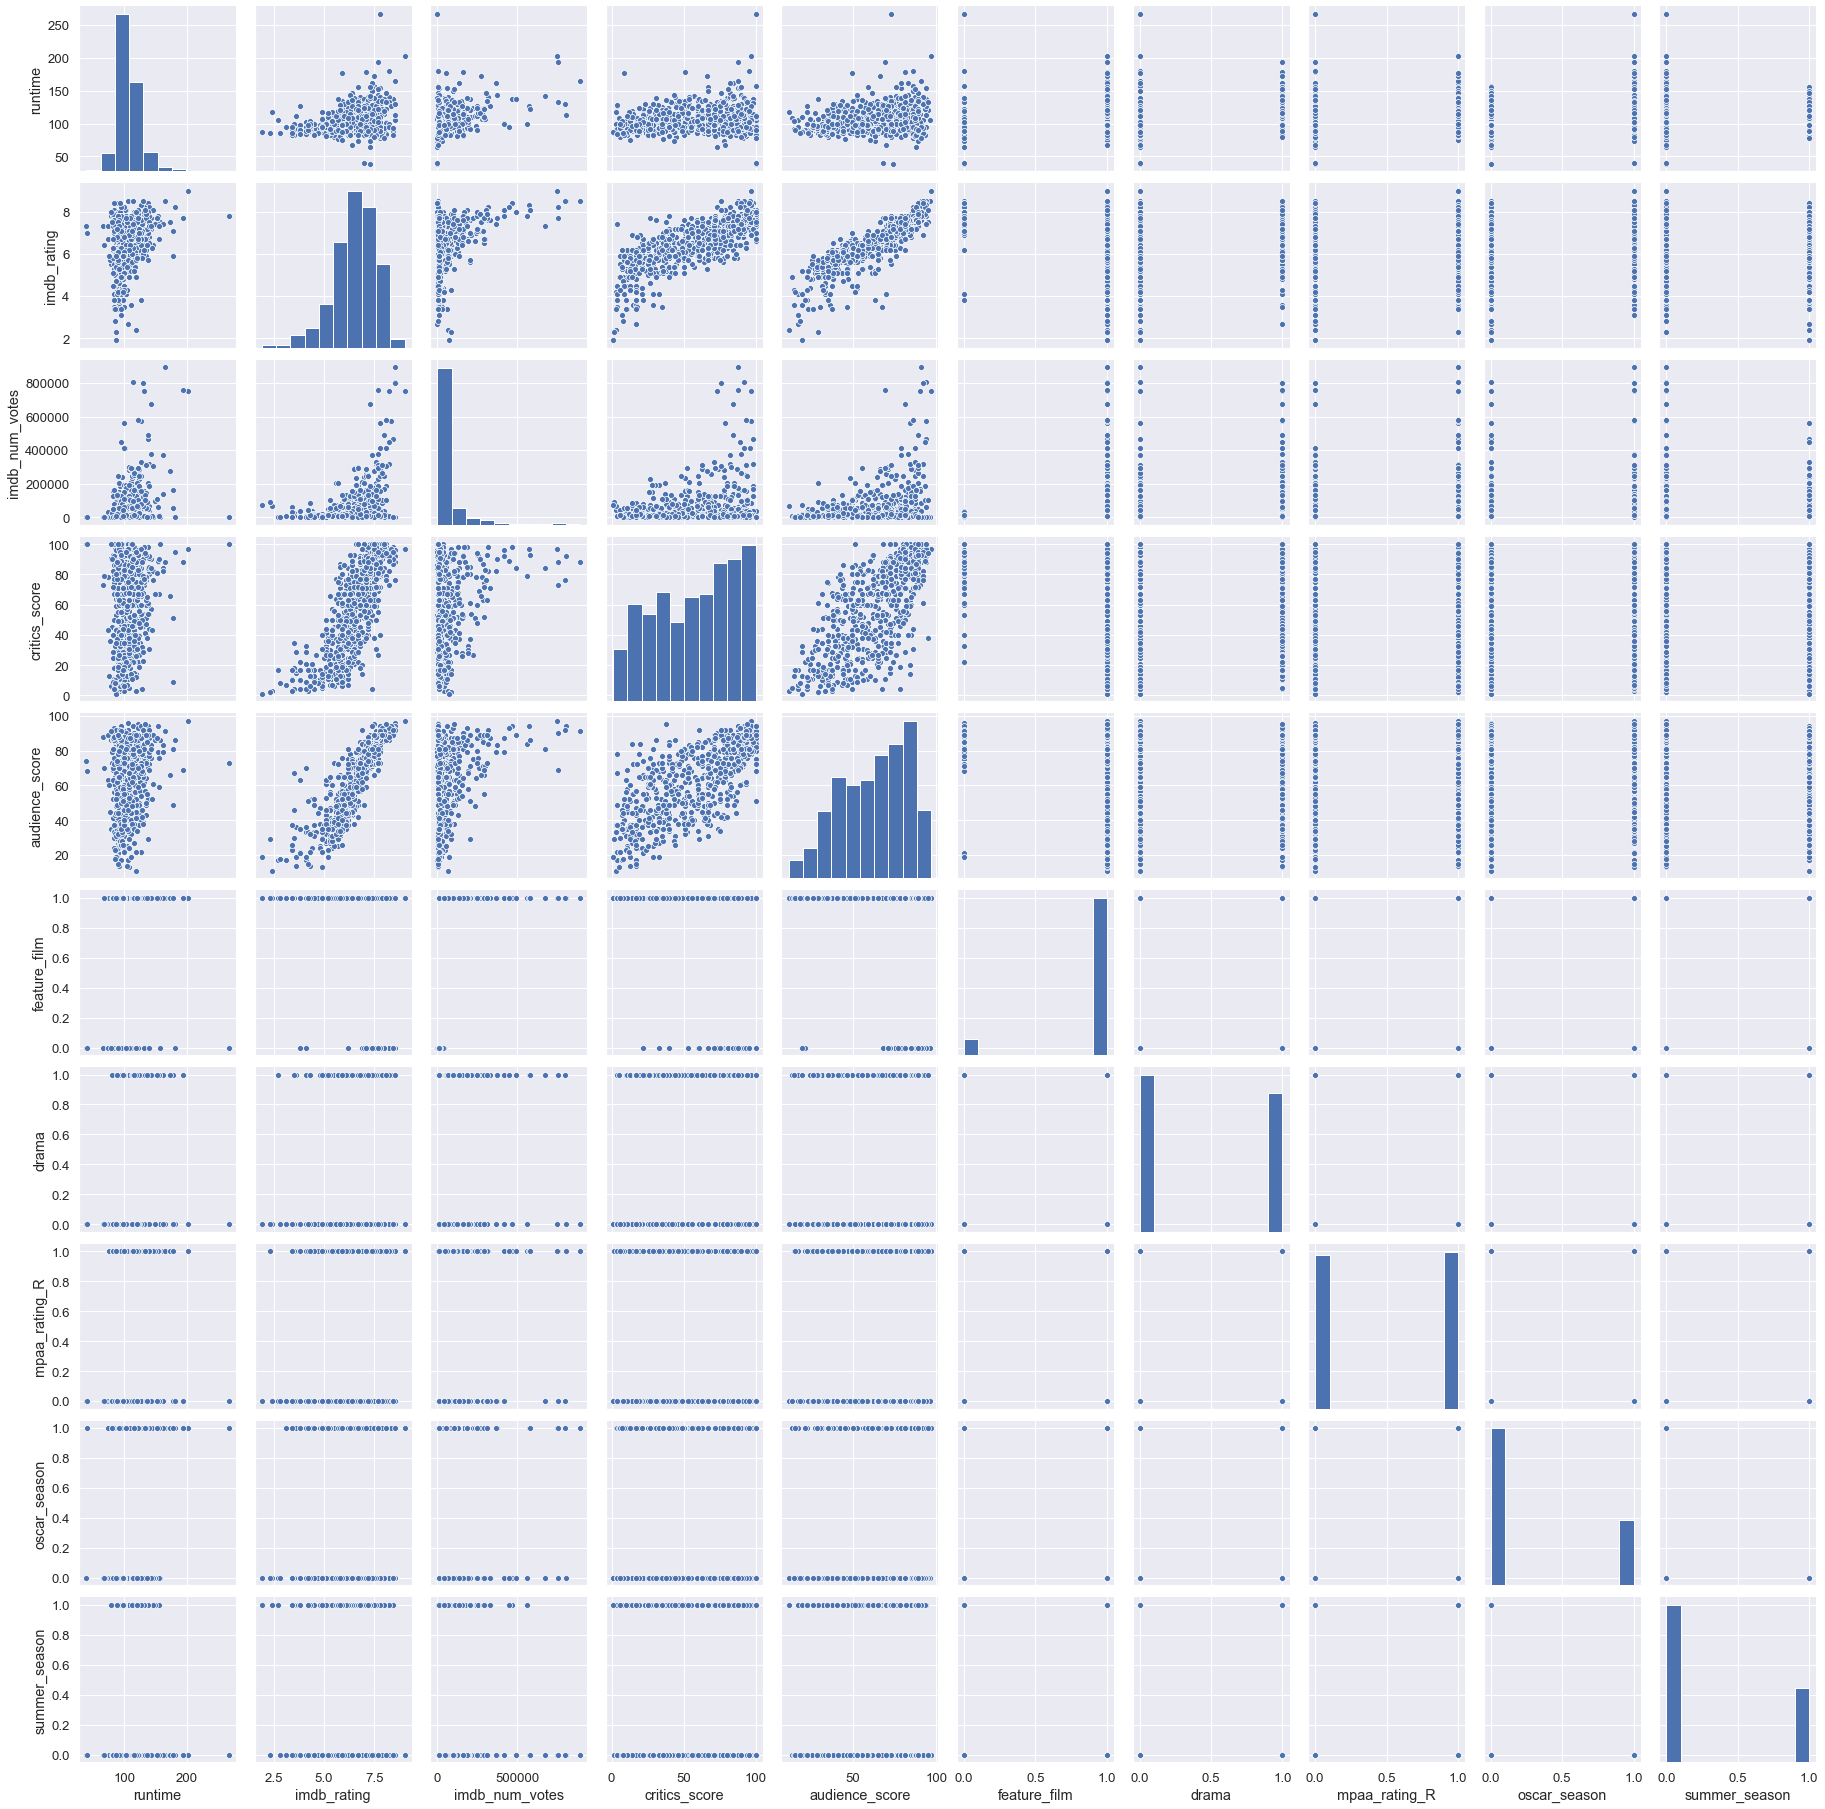

In [38]:
sns.pairplot(df)
plt.show()

In [39]:
df.columns

Index(['runtime', 'imdb_rating', 'imdb_num_votes', 'critics_score', 'audience_score', 'feature_film', 'drama', 'mpaa_rating_R', 'oscar_season', 'summer_season'], dtype='object')

In [40]:
#Rearrange the features

df = df[['runtime', 'imdb_rating', 'imdb_num_votes', 'critics_score','feature_film', 'drama', 'mpaa_rating_R', 'oscar_season', 
         'summer_season', 'audience_score']]

In [41]:
df

,runtime,imdb_rating,imdb_num_votes,critics_score,feature_film,drama,mpaa_rating_R,oscar_season,summer_season,audience_score
0,80.0,5.5,899,45,1,1,1,0,0,73
1,101.0,7.3,12285,96,1,1,0,0,0,81
2,84.0,7.6,22381,91,1,0,1,0,1,91
3,139.0,7.2,35096,80,1,1,0,1,0,76
4,90.0,5.1,2386,33,1,0,1,0,0,27
...,...,...,...,...,...,...,...,...,...,...
646,97.0,5.9,8345,44,1,1,0,0,1,26
647,82.0,6.7,46794,29,1,0,1,0,0,81
648,87.0,5.9,10087,80,1,0,1,0,0,52
649,120.0,5.8,66054,31,1,0,0,0,1,34


### Data Preprocessing

### Treat Missing Values

In [42]:
df.isnull().sum()

runtime           1
imdb_rating       0
imdb_num_votes    0
critics_score     0
feature_film      0
drama             0
mpaa_rating_R     0
oscar_season      0
summer_season     0
audience_score    0
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

runtime           0
imdb_rating       0
imdb_num_votes    0
critics_score     0
feature_film      0
drama             0
mpaa_rating_R     0
oscar_season      0
summer_season     0
audience_score    0
dtype: int64

### Treat Duplicate Values

In [45]:
df.duplicated(keep='first').sum()

1

### Create and save processed dataset

In [46]:
#df.to_csv("moviestrain2.csv",index=False)

In [47]:
df.shape

(650, 10)

## Predict Audience Score

### Train Test Split

In [48]:
X = df.iloc[:,0:9]
y = df.iloc[:,9]

In [49]:
X.values, y.values

(array([[8.0000e+01, 5.5000e+00, 8.9900e+02, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.0100e+02, 7.3000e+00, 1.2285e+04, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [8.4000e+01, 7.6000e+00, 2.2381e+04, ..., 1.0000e+00, 0.0000e+00,
         1.0000e+00],
        ...,
        [8.7000e+01, 5.9000e+00, 1.0087e+04, ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.2000e+02, 5.8000e+00, 6.6054e+04, ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [9.7000e+01, 4.2000e+00, 4.3574e+04, ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00]]),
 array([73, 81, 91, 76, 27, 86, 76, 47, 89, 66, 75, 46, 89, 53, 36, 64, 80,
        92, 24, 19, 73, 86, 42, 71, 77, 41, 81, 43, 61, 91, 71, 77, 85, 70,
        57, 55, 70, 51, 94, 81, 64, 88, 64, 40, 94, 62, 64, 49, 17, 40, 88,
        75, 56, 52, 83, 72, 59, 38, 35, 43, 54, 44, 96, 89, 58, 52, 90, 55,
        52, 85, 43, 30, 38, 75, 55, 39, 59, 47, 24, 87, 83, 81, 35, 34, 92,
        55, 54, 14, 76, 40, 8

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((520, 9), (130, 9), (520,), (130,))

### Feature Scaling

In [52]:
X_train

,runtime,imdb_rating,imdb_num_votes,critics_score,feature_film,drama,mpaa_rating_R,oscar_season,summer_season
34,112.0,6.6,4908,40,1,0,1,0,0
433,105.0,5.9,33040,43,1,0,0,0,0
400,112.0,5.8,1816,38,1,0,0,0,1
347,86.0,2.3,87652,2,1,0,1,0,0
543,128.0,5.8,6418,50,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
9,119.0,6.6,12496,83,1,1,0,0,0
360,98.0,6.0,109633,60,1,0,0,0,1
192,112.0,5.9,725,33,1,1,1,0,0
630,119.0,5.7,8818,26,1,1,1,0,0


In [53]:
minmax = MinMaxScaler()

In [54]:
X_train_scaled = minmax.fit_transform(X_train)

In [55]:
X_test_scaled = minmax.transform(X_test)

In [56]:
X_train_scaled

array([[3.20175439e-01, 6.61971831e-01, 5.29553285e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.89473684e-01, 5.63380282e-01, 3.68044013e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.20175439e-01, 5.49295775e-01, 1.83237981e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.20175439e-01, 5.63380282e-01, 6.10419924e-04, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.50877193e-01, 5.35211268e-01, 9.67487579e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.93859649e-01, 7.88732394e-01, 1.12787681e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [57]:
X_test_scaled

array([[0.23684211, 0.53521127, 0.02125941, ..., 0.        , 0.        ,
        0.        ],
       [0.24561404, 0.16901408, 0.00911598, ..., 0.        , 1.        ,
        0.        ],
       [0.24122807, 0.61971831, 0.07060598, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.21491228, 0.69014085, 0.01812891, ..., 0.        , 0.        ,
        1.        ],
       [0.22368421, 0.81690141, 0.06354975, ..., 0.        , 0.        ,
        1.        ],
       [0.25438596, 0.5915493 , 0.00295466, ..., 1.        , 0.        ,
        1.        ]])

### Model Training

### Using PyCaret

In [58]:
exp_reg = setup(data = df, target = 'audience_score', session_id=0, normalize=True, train_size=0.8,
               categorical_features=['feature_film', 'drama', 'mpaa_rating_R', 'oscar_season', 'summer_season'],
               normalize_method='minmax') 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,0
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(650, 10)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [59]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Random Forest,6.7427,86.7840,9.2398,0.7755,0.2017,0.1429,0.2499
1,CatBoost Regressor,6.7425,88.1822,9.3030,0.7704,0.2009,0.1409,2.0891
2,Extra Trees Regressor,6.9914,91.9652,9.5333,0.7614,0.2056,0.1473,0.1929
3,Gradient Boosting Regressor,6.8254,93.7363,9.5803,0.7562,0.2082,0.1447,0.1094
4,Light Gradient Boosting Machine,6.9725,95.2568,9.6376,0.7506,0.2090,0.1446,0.0973
5,AdaBoost Regressor,7.4243,98.8017,9.8935,0.7464,0.2216,0.1666,0.1441
6,Extreme Gradient Boosting,7.2543,102.6510,10.0494,0.7349,0.2141,0.1500,0.1427
7,Least Angle Regression,7.8093,103.1230,10.0840,0.7343,0.2474,0.1623,0.0076
8,Linear Regression,7.7977,103.4796,10.0958,0.7332,0.2475,0.1615,0.0047
9,Bayesian Ridge,7.8215,103.5642,10.1041,0.7330,0.2484,0.1617,0.0064


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [60]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.8202,78.0767,8.8361,0.8302,0.1906,0.1154
1,6.9652,92.3806,9.6115,0.7785,0.2034,0.1482
2,6.5858,72.1866,8.4963,0.7915,0.2250,0.1666
3,7.5908,92.4536,9.6153,0.8081,0.2166,0.1810
4,6.3860,69.5025,8.3368,0.8148,0.1585,0.1222
5,5.5556,56.2920,7.5028,0.8452,0.1331,0.0907
6,7.3292,145.2290,12.0511,0.5230,0.2756,0.1394
7,7.3779,104.7064,10.2326,0.7742,0.2421,0.1797
8,6.5133,74.6975,8.6428,0.8124,0.1713,0.1304
9,7.3037,82.3154,9.0728,0.7767,0.2011,0.1555


In [61]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


In [62]:
tuned_rf = tune_model(rf, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.5978,74.5193,8.6325,0.8379,0.1872,0.1116
1,6.4140,83.9263,9.1611,0.7988,0.1963,0.1382
2,6.6092,75.1340,8.6680,0.7830,0.2230,0.1633
3,7.4272,91.9287,9.5879,0.8092,0.2111,0.1741
4,6.4163,73.2815,8.5605,0.8048,0.1622,0.1231
5,5.7255,59.1193,7.6889,0.8374,0.1350,0.0930
6,7.3258,144.4914,12.0205,0.5254,0.2742,0.1379
7,6.8528,88.5898,9.4122,0.8089,0.2145,0.1585
8,6.0770,68.6431,8.2851,0.8276,0.1662,0.1226
9,7.4556,81.4794,9.0266,0.7789,0.1939,0.1534


In [63]:
print(tuned_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=110, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)


In [64]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [65]:
predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,6.7141,71.4891,8.4551,0.8346,0.1931,0.1512


,runtime,imdb_rating,imdb_num_votes,critics_score,feature_film_0,feature_film_1,drama_0,drama_1,mpaa_rating_R_0,mpaa_rating_R_1,oscar_season_0,oscar_season_1,summer_season_0,summer_season_1,audience_score,Label
0,0.236842,0.535211,0.021259,0.161616,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,44,42.2750
1,0.245614,0.169014,0.009116,0.060606,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,17,26.0714
2,0.241228,0.619718,0.070606,0.797980,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,49,58.4607
3,0.359649,0.676056,0.065776,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,70,64.1179
4,0.359649,0.661972,0.003976,0.484848,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,66,56.3786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.429825,0.859155,0.548947,0.838384,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,89,90.4071
126,0.271930,0.676056,0.010205,0.757576,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,71,64.2786
127,0.214912,0.690141,0.018129,0.767677,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,73,75.2750
128,0.223684,0.816901,0.063550,0.545455,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,78,84.3000
